In [61]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,  plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
# Load the experimental dataset (with "Class" column)
df_exp = pd.read_csv('../data/creditcard.csv')

# Drop duplicates
df_exp = df_exp.drop_duplicates()

# Normalizing the "Amount" column
scaler = StandardScaler()
df_exp["Normalized_Amount"] = scaler.fit_transform(df_exp["Amount"].values.reshape(-1, 1))

# Drop the original "Amount" column (optional)
df_exp = df_exp.drop(["Amount"], axis=1)

In [72]:
# Fetching the target feature ("Class")
Y_exp = df_exp["Class"]

# Fetching the independent features (dropping "Class")
X_exp = df_exp.drop(["Class"], axis=1)

# Handle class imbalance using SMOTE
X_balance, Y_balance = SMOTE().fit_resample(X_exp, Y_exp)

# Split the experimental data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_balance, Y_balance, test_size=1/3, random_state=42)

# Initialize and train the decision tree classifier
dt_model_exp = DecisionTreeClassifier(random_state=42)
dt_model_exp.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [66]:
## ----
# Load my dummy dataset (without "Class" column)
df = pd.read_csv('../data/credit_card_fraud_data.csv')

# Drop duplicates
df = df.drop_duplicates()

# Normalizing the "Amount" column
df["Normalized_Amount"] = scaler.transform(df["Amount"].values.reshape(-1, 1))

df = df.drop(columns=['Amount'])

# Now predict the "Class" for your dataset using the trained model
predicted_class = dt_model_exp.predict(df)

# Adding the predicted "Class" as a new column to your dataset
df['Predicted_Class'] = predicted_class

# Display the first few rows to see the predicted results
df['Predicted_Class'].value_counts()

Predicted_Class
0    992
1      8
Name: count, dtype: int64

In [67]:
# Display only fraudulent transactions
fraudulent_transactions = df[df['Predicted_Class'] == 1]

# Display original values and predicted class
fraudulent_transactions.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Normalized_Amount,Predicted_Class
236,237.0,-0.356494,-0.143378,-0.207078,2.441477,0.120756,-1.564299,0.495287,-0.342087,-0.949854,...,1.495277,0.943281,-0.421628,1.465883,-0.153959,-0.648351,0.083017,1.549563,1.527507,1
377,378.0,0.514196,1.016627,0.046680,1.185916,-0.035729,0.803323,0.316750,1.595423,-1.368384,...,-0.180684,-0.318345,-0.356727,-0.324511,-1.698474,0.403250,-0.802473,0.939647,0.104776,1
532,533.0,4.875402,-10.583364,5.107857,-6.085438,7.504997,-3.479521,9.625983,-10.025465,-0.525725,...,-7.998640,-27.940916,-2.788085,11.235076,10.320529,-2.471068,14.317001,-13.717386,36.578271,1
561,562.0,2.323936,0.457023,0.352852,1.711868,-0.020964,-2.088414,-0.507075,-1.507781,-1.528861,...,-0.290544,0.428867,1.439327,0.578483,-1.042440,0.747082,0.502791,1.666073,0.129872,1
566,567.0,-6.197138,-19.415277,-1.926966,12.223044,-15.671648,-13.799165,7.285313,-4.769363,-9.162614,...,3.673750,5.689047,-3.188123,-3.729964,-6.268285,5.403837,1.981803,2.397623,36.211868,1


In [69]:
# Simulate true labels based on some condition
# Assuming that any normalized amount above a certain threshold is fraudulent
threshold = 5.0  # Example threshold; adjust based on your logic
df['True_Class'] = (df['Normalized_Amount'] > threshold).astype(int)

# Now you can evaluate the model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Evaluate the model
accuracy = accuracy_score(df['True_Class'], predicted_class)
precision = precision_score(df['True_Class'], predicted_class)
recall = recall_score(df['True_Class'], predicted_class)
f1 = f1_score(df['True_Class'], predicted_class)

# Print evaluation metrics
print("Accuracy: {:.5f}".format(accuracy))
print("Precision: {:.5f}".format(precision))
print("Recall: {:.5f}".format(recall))
print("F1-score: {:.5f}".format(f1))

Accuracy: 0.97500
Precision: 0.25000
Recall: 0.09524
F1-score: 0.13793


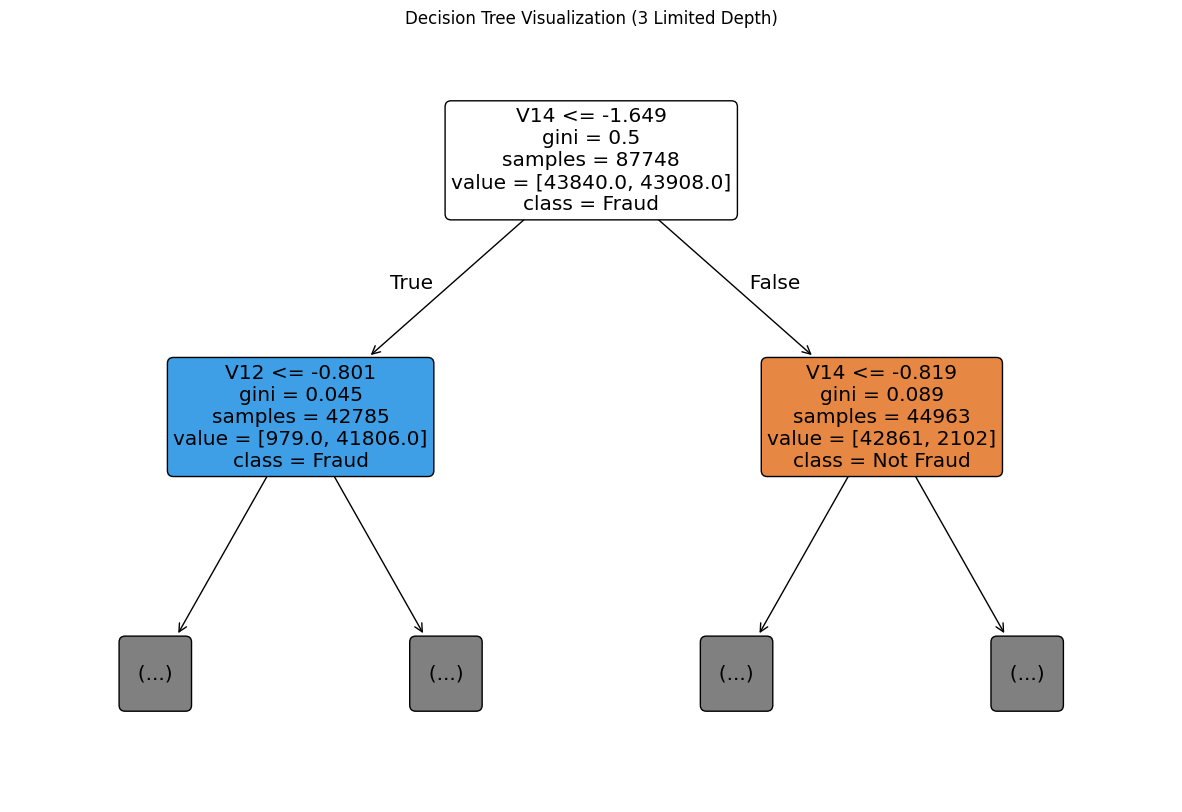

In [70]:
# Visualization of the Decision Tree with 3 limited depth

plt.figure(figsize=(15, 10))
plot_tree(dt_model_exp, 
          filled=True, 
          feature_names=X_exp.columns, 
          class_names=['Not Fraud', 'Fraud'], 
          rounded=True,
          max_depth=1)  # Limit the depth here
plt.title("Decision Tree Visualization (3 Limited Depth)")
plt.show()

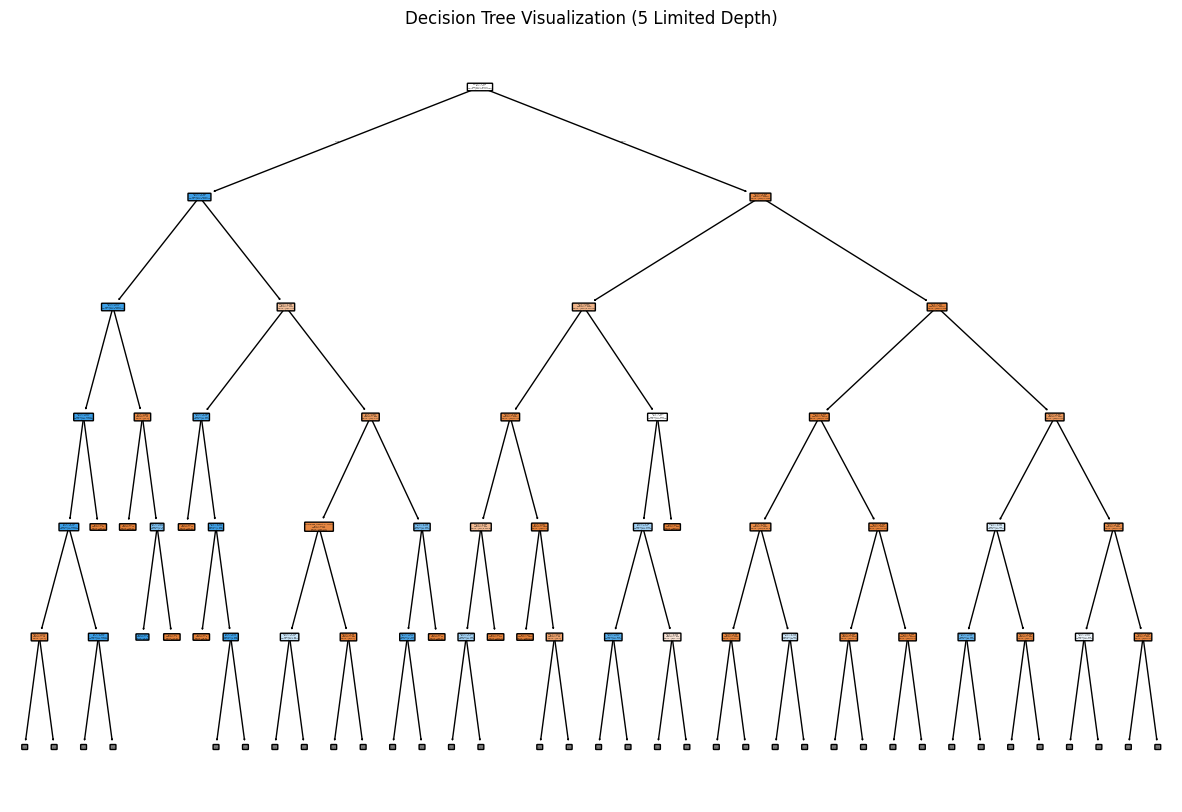

In [71]:
# Visualization of the Decision Tree with 5 limited depth

plt.figure(figsize=(15, 10))
plot_tree(dt_model_exp, 
          filled=True, 
          feature_names=X_exp.columns, 
          class_names=['Not Fraud', 'Fraud'], 
          rounded=True,
          max_depth=5)  # Limit the depth here
plt.title("Decision Tree Visualization (5 Limited Depth)")
plt.show()